In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
# Spécifier le chemin absolu complet du fichier CSV
df = pd.read_csv("Authentification VPN.csv",delimiter=';', encoding='ISO-8859-1')

In [3]:
df.head()

Adresse-IP-source GeoLocation-source Nom-utilisateur  \
0       147.161.1.1              Spain    a.safieddine   
1       147.161.1.2              Spain          h.sbaa   
2       147.161.1.3              Spain       m.lahrizi   
3       147.161.1.4              India         r.vemaa   
4       147.161.1.4              India         r.vemaa   

  Date-detection-comportement     Description-comportement  
0            09/03/2023 08:47  Authentification Hors Maroc  
1            09/03/2023 08:33  Authentification Hors Maroc  
2            09/03/2023 07:59  Authentification Hors Maroc  
3            09/03/2023 06:59  Authentification Hors Maroc  
4            09/03/2023 06:36  Authentification Hors Maroc

In [4]:
# Data Preprocessing
# Encode categorical variables
label_encoder = LabelEncoder()
df['GeoLocation-source'] = label_encoder.fit_transform(df['GeoLocation-source'])
df['Nom-utilisateur'] = label_encoder.fit_transform(df['Nom-utilisateur'])
df['Date-detection-comportement'] = pd.to_datetime(df['Date-detection-comportement'])
df['Date-detection-comportement'] = df['Date-detection-comportement'].dt.hour

# IP address one-hot encoding
ip_columns = ['ip_part_1', 'ip_part_2', 'ip_part_3', 'ip_part_4']
ip_parts = df['Adresse-IP-source'].str.split('.', expand=True).astype(int)
ip_parts.columns = ip_columns
df = pd.concat([df, ip_parts], axis=1)

df.drop('Adresse-IP-source', axis=1, inplace=True)

In [5]:
# Split data into features and target variable
X = df.drop('Description-comportement', axis=1)
y = df['Description-comportement']

In [6]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Data Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
# Accuracy Calculation
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6153846153846154


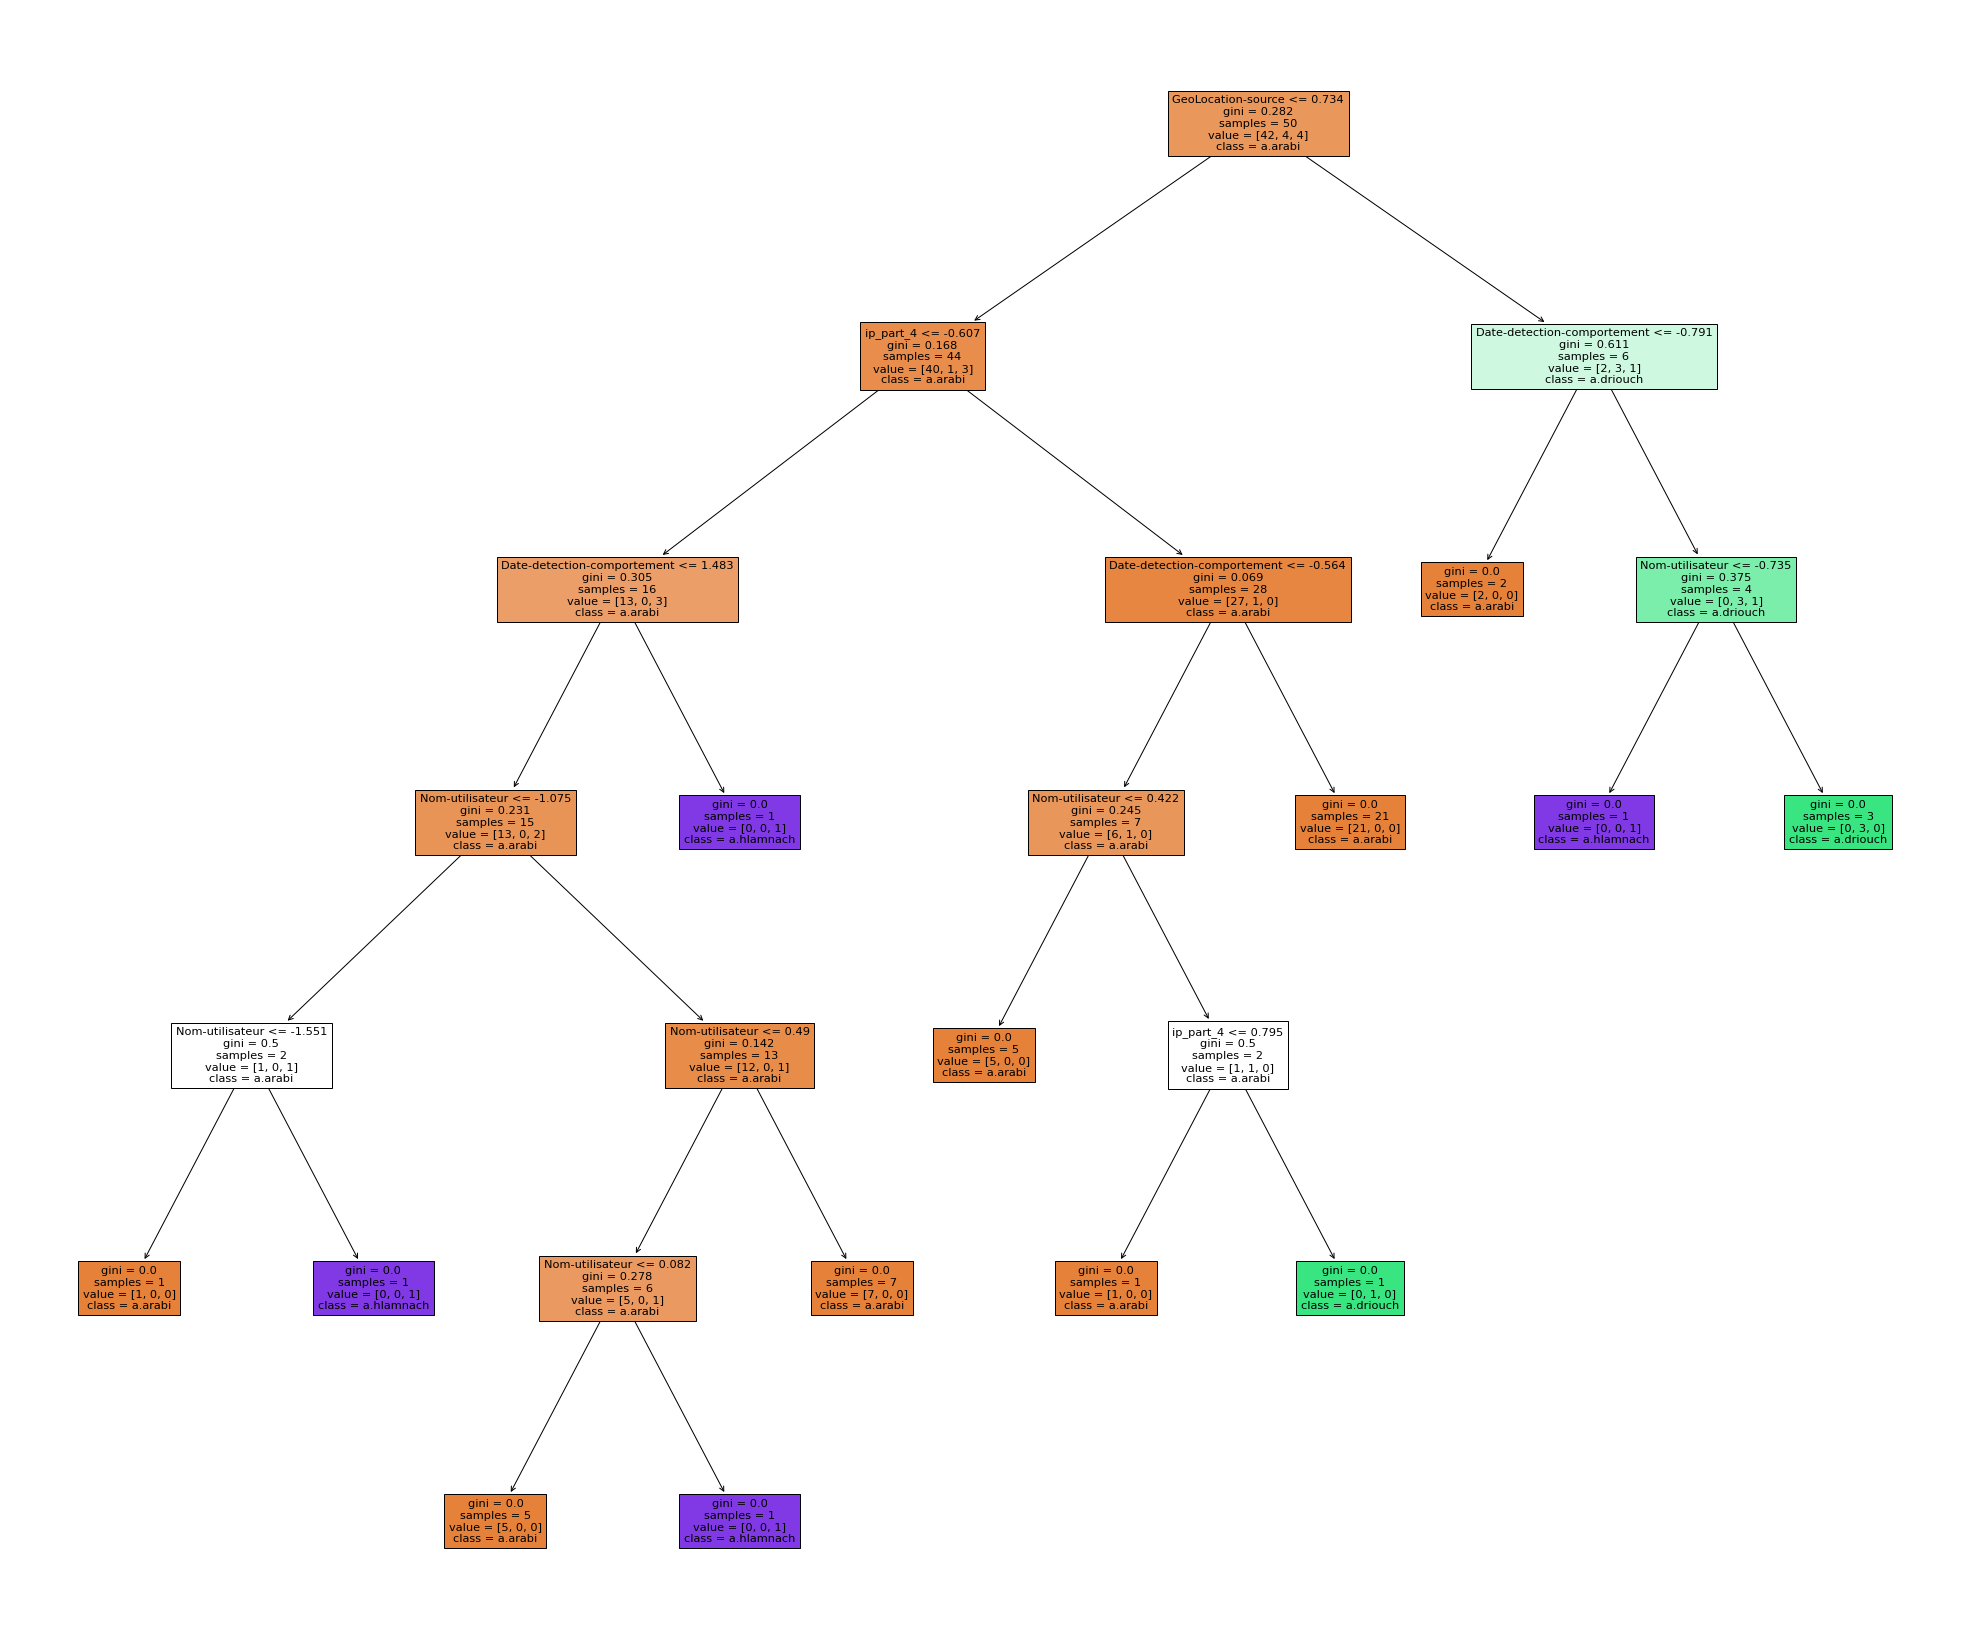

In [10]:
# Display Decision Tree
plt.figure(figsize=(35, 30))
tree.plot_tree(classifier, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
plt.show()

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import matplotlib.pyplot as plt

df = pd.read_csv("Attaque DDOS.csv",delimiter=';', encoding='ISO-8859-1')

In [12]:
df.head()

Adresse-IP-source                                 analyse-reputation   \
0       187.10.21.11    Brazil, Adresse dotée d'une mauvaise réputation   
1       187.10.21.12    Taiwan, Adresse dotée d'une mauvaise réputation   
2       187.10.21.13  United States, Adresse dotée d'une mauvaise ré...   
3       187.10.21.14  South Korea, Adresse dotée d'une mauvaise répu...   
4       187.10.21.14  South Korea, Adresse dotée d'une mauvaise répu...   

  Adresse-IP-destination  Date-detection-comportement  \
0             41.37.17.73            09/03/2023 07:52   
1             41.37.17.73            09/03/2023 07:49   
2             41.37.17.73            09/03/2023 06:38   
3             41.37.17.73            09/03/2023 05:42   
4             41.37.17.73            09/03/2023 05:37   

  Description-comportement Type-comportement  
0             DDoS Botnets      Faux positif  
1             DDoS Botnets      Faux positif  
2             DDoS Botnets      Faux positif  
3             DDoS Botnets      Faux positif  
4             DDoS Botnets      Faux positif

In [13]:
df.columns

Index(['Adresse-IP-source ', 'analyse-reputation ', 'Adresse-IP-destination ',
       'Date-detection-comportement', 'Description-comportement',
       'Type-comportement'],
      dtype='object')

In [14]:
label_encoder = LabelEncoder()
df['analyse-reputation '] = label_encoder.fit_transform(df['analyse-reputation '])
df['Description-comportement'] = label_encoder.fit_transform(df['Description-comportement'])
df['Type-comportement'] = label_encoder.fit_transform(df['Type-comportement'])
df['Date-detection-comportement'] = pd.to_datetime(df['Date-detection-comportement'])
df['Date-detection-comportement'] = df['Date-detection-comportement'].dt.hour

ip_columns = ['ip_part_1', 'ip_part_2', 'ip_part_3', 'ip_part_4']
ip_parts = df['Adresse-IP-source '].str.split('.', expand=True).astype(int)
ip_parts.columns = ip_columns
df = pd.concat([df, ip_parts], axis=1)

df.drop(['Adresse-IP-source ','Adresse-IP-destination '], axis=1, inplace=True)

In [15]:
df.head()

analyse-reputation   Date-detection-comportement  Description-comportement  \
0                   37                            7                         1   
1                   44                            7                         1   
2                   46                            6                         1   
3                   43                            5                         1   
4                   43                            5                         1   

   Type-comportement  ip_part_1  ip_part_2  ip_part_3  ip_part_4  
0                  0        187         10         21         11  
1                  0        187         10         21         12  
2                  0        187         10         21         13  
3                  0        187         10         21         14  
4                  0        187         10         21         14

In [16]:
X = df.drop('Type-comportement', axis=1)
y = df['Type-comportement']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


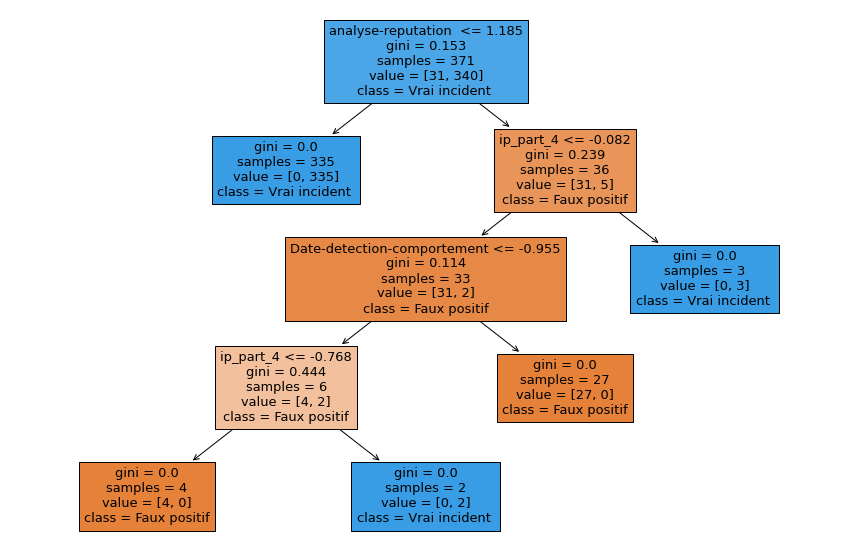

In [21]:
plt.figure(figsize=(15, 10))
tree.plot_tree(classifier, feature_names=X.columns, class_names=label_encoder.classes_.astype(str), filled=True)
plt.show()

In [22]:
# Spécifier le chemin absolu complet du fichier CSV
df = pd.read_csv("Virus ransomeware.csv",delimiter=';', encoding='ISO-8859-1')

In [23]:
df.head()

Adresse-IP-source Details-IP-source Adresse-IP-destination  \
0        124.04.256             India               12.07.34   
1        124.04.256             India               12.07.35   
2        124.04.256             India               12.07.36   
3        124.04.256             Paris               12.07.37   
4        124.04.256             Paris               12.07.38   

  Date-debut-comportement                          Description-comportement  \
0        18/01/2023 00:00  Plusieurs tentatives d'authentification échouées   
1        19/01/2023 00:00  Plusieurs tentatives d'authentification échouées   
2        20/01/2023 00:00  Plusieurs tentatives d'authentification échouées   
3        21/01/2023 00:00  Plusieurs tentatives d'authentification échouées   
4        22/01/2023 00:00  Plusieurs tentatives d'authentification échouées   

  Type-comportement  
0     Vrai incident  
1     Vrai incident  
2     Vrai incident  
3     Vrai incident  
4     Vrai incident

In [24]:
df.columns

Index(['Adresse-IP-source', 'Details-IP-source', 'Adresse-IP-destination',
       'Date-debut-comportement', 'Description-comportement',
       'Type-comportement'],
      dtype='object')

In [25]:
# Data Preprocessing
# Encode categorical variables
label_encoder = LabelEncoder()
df['Details-IP-source'] = label_encoder.fit_transform(df['Details-IP-source'])
df['Description-comportement'] = label_encoder.fit_transform(df['Description-comportement'])
df['Type-comportement'] = label_encoder.fit_transform(df['Type-comportement'])


df.drop(['Adresse-IP-source','Adresse-IP-destination','Date-debut-comportement'], axis=1, inplace=True)

In [26]:
df.head()

Details-IP-source  Description-comportement  Type-comportement
0                  1                         1                  1
1                  1                         1                  1
2                  1                         1                  1
3                  2                         1                  1
4                  2                         1                  1

In [27]:
# Split data into features and target variable
X = df.drop('Type-comportement', axis=1)
y = df['Type-comportement']

In [28]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Data Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
# Accuracy Calculation
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.625


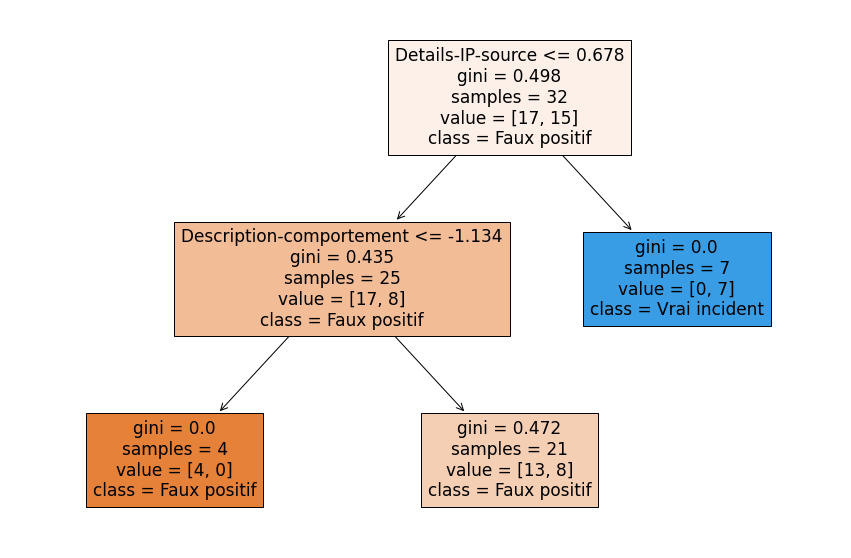

In [32]:
# Display Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(classifier, feature_names=X.columns, class_names=label_encoder.classes_.astype(str), filled=True)
plt.show()

In [33]:
# Spécifier le chemin absolu complet du fichier CSV
df = pd.read_csv("JIRA.csv",delimiter=';', encoding='ISO-8859-1')

In [34]:
df.head()

Etat    Priorite   Responsable      Createur date-creation   \
0  Initié  Priorité 1  bbb@atos.net  aaa@atos.net     18/12/2019   
1  Initié  Priorité 1  bbb@atos.net  aaa@atos.net     19/12/2019   
2  Initié  Priorité 1  bbb@atos.net  aaa@atos.net     20/12/2019   
3  Initié  Priorité 1  bbb@atos.net  aaa@atos.net     21/12/2019   
4  Initié  Priorité 2  bbb@atos.net  aaa@atos.net     22/12/2019   

  date-generation-comportement Temps-prise-en-charge date-resolution  \
0                   20/12/2019            10/01/2023      10/02/2023   
1                   21/12/2019            11/01/2023      11/02/2023   
2                   22/12/2019            12/01/2023      12/02/2023   
3                   23/12/2019            13/01/2023      13/02/2023   
4                   24/12/2019            14/01/2023      14/02/2023   

                                      Statut      Categorie     Sous-Categorie  
0                                Faux positif  Catégorie 1   Sous-catégories 1  
1                                Faux positif   Catégorie 2  Sous-catégories 2  
2                               Incident réel   Catégorie 3  Sous-catégories 3  
3  Faux positif - tuning solution de sécurité   Catégorie 4  Sous-catégories 4  
4                  Faux positif - tuning SIEM   Catégorie 5  Sous-catégories 5

In [35]:
df.columns

Index(['Etat', 'Priorite', 'Responsable', 'Createur', 'date-creation ',
       'date-generation-comportement', 'Temps-prise-en-charge',
       'date-resolution', 'Statut ', 'Categorie', 'Sous-Categorie'],
      dtype='object')

In [36]:
# Data Preprocessing
# Encode categorical variables
label_encoder = LabelEncoder()
df['Etat'] = label_encoder.fit_transform(df['Etat'])
df['Priorite'] = label_encoder.fit_transform(df['Priorite'])
df['Responsable'] = label_encoder.fit_transform(df['Responsable'])
df['Createur'] = label_encoder.fit_transform(df['Createur'])
df['Statut '] = label_encoder.fit_transform(df['Statut '])
df['Categorie'] = label_encoder.fit_transform(df['Categorie'])
df['Sous-Categorie'] = label_encoder.fit_transform(df['Sous-Categorie'])


df.drop(['date-creation ','date-generation-comportement','Temps-prise-en-charge','date-resolution'], axis=1, inplace=True)

In [37]:
df.head()

Etat  Priorite  Responsable  Createur  Statut   Categorie  Sous-Categorie
0     4         0            1         0        1          0               0
1     4         0            1         0        1         11              11
2     4         0            1         0        4         12              12
3     4         0            1         0        3         13              13
4     4         1            1         0        2         14              14

In [38]:
# Split data into features and target variable
X = df.drop('Priorite', axis=1)
y = df['Priorite']

In [39]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Data Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
# Accuracy Calculation
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


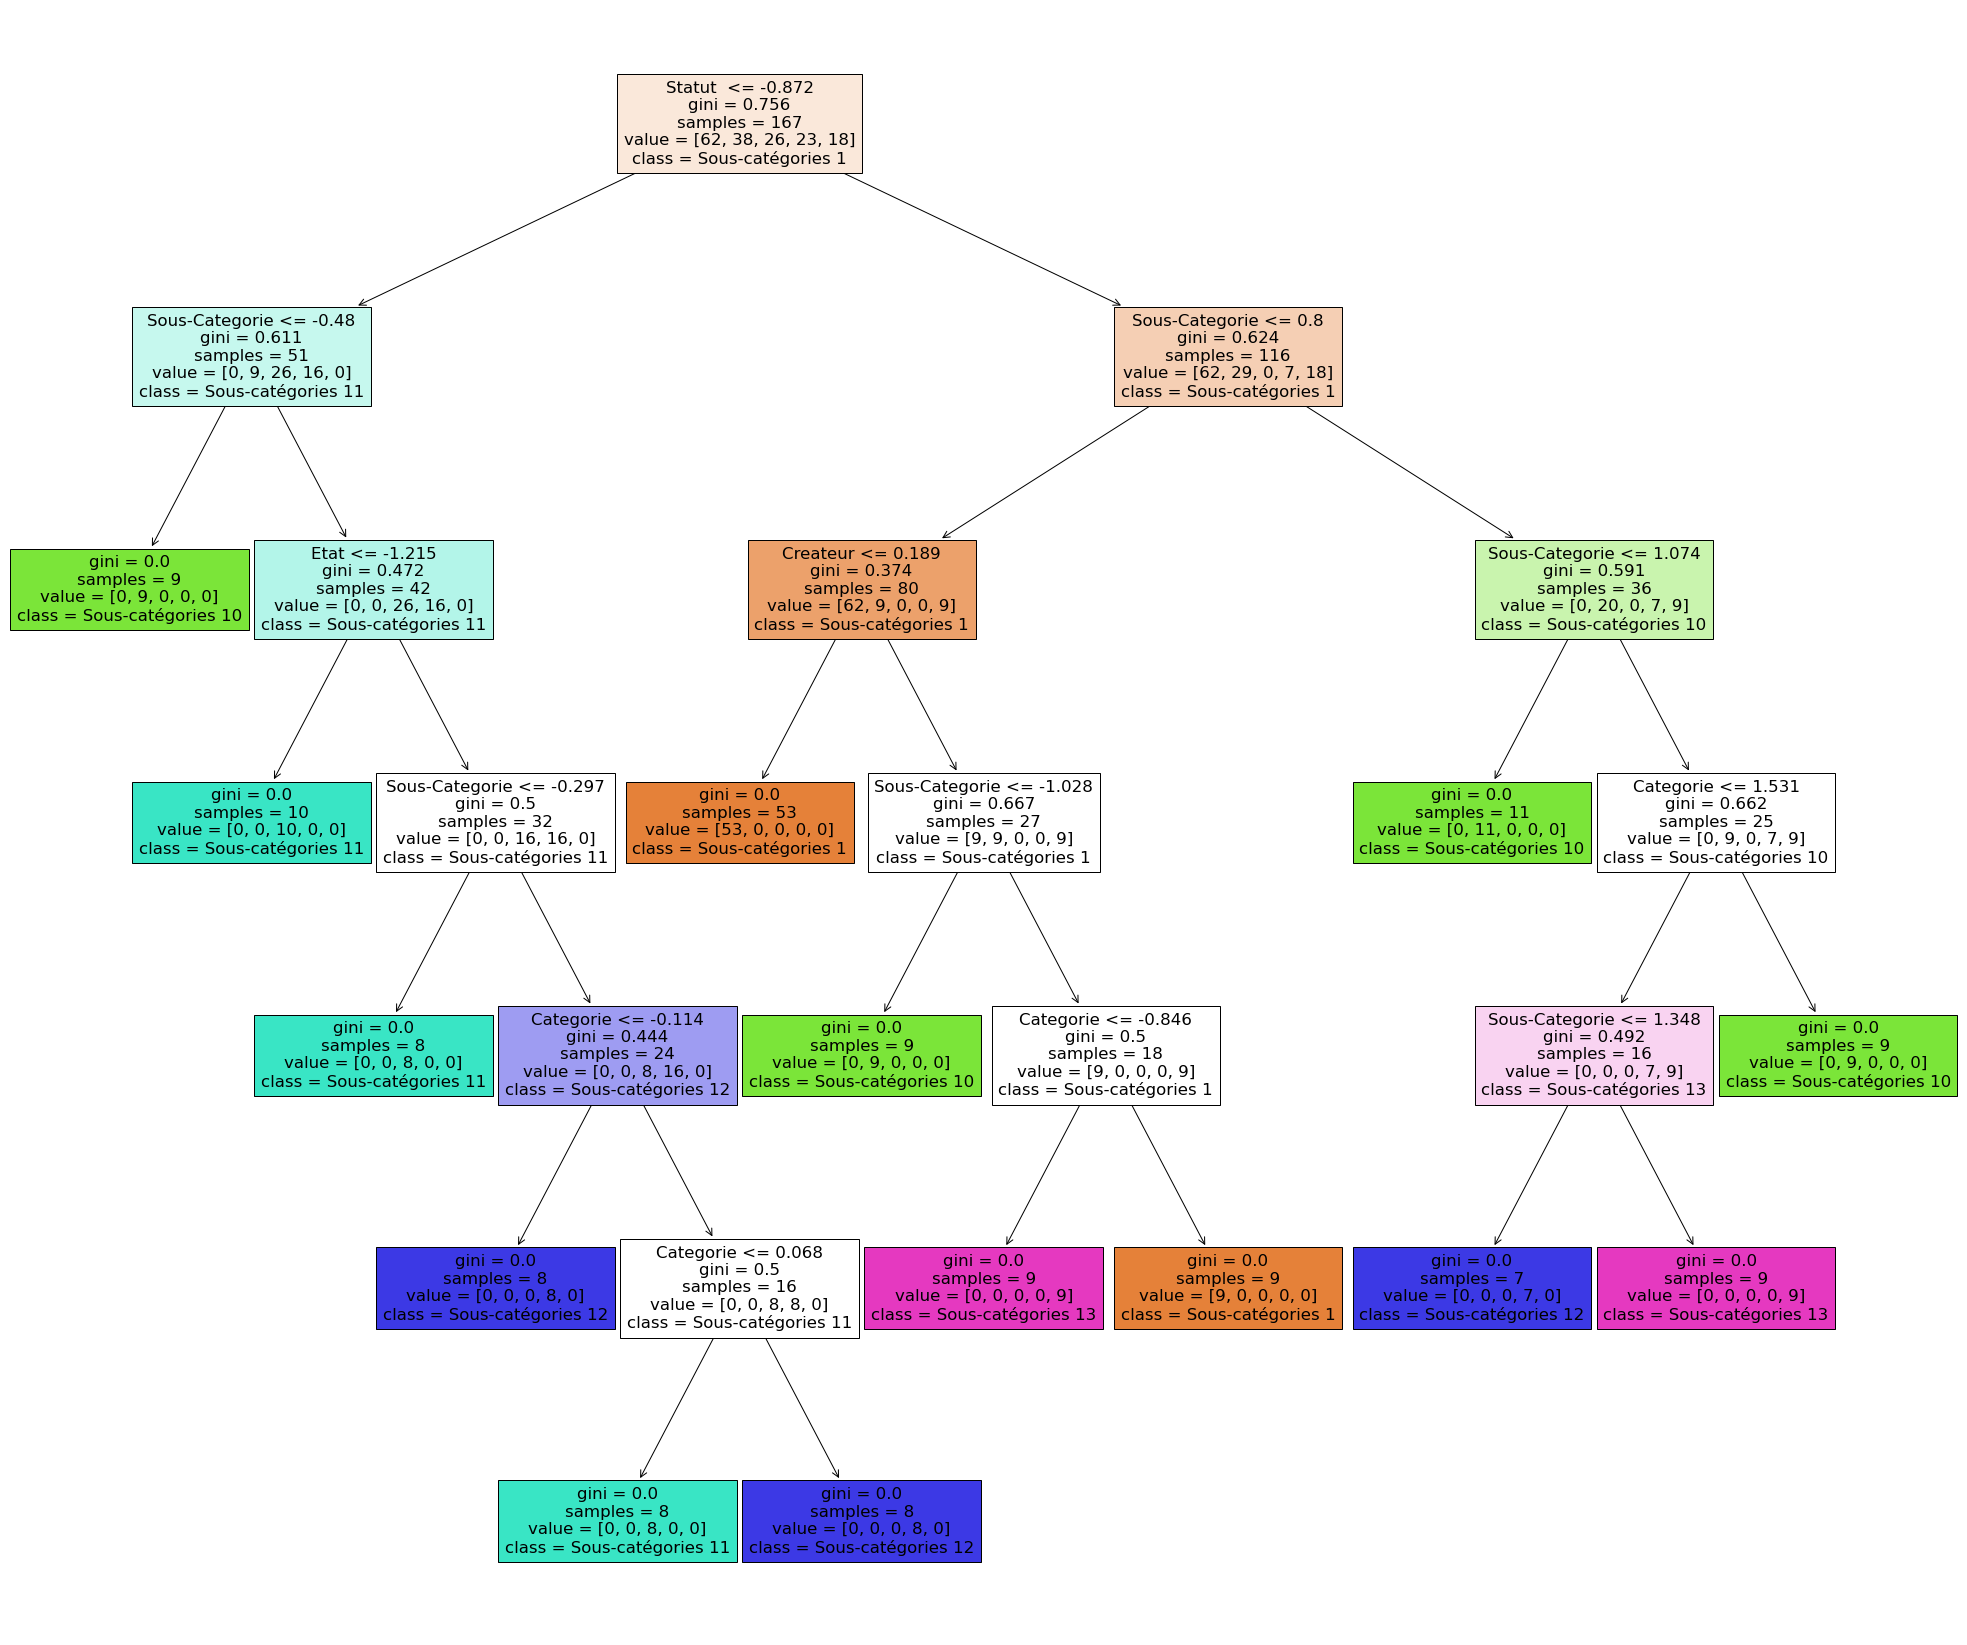

In [43]:
# Display Decision Tree
plt.figure(figsize=(35, 30))
tree.plot_tree(classifier, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
plt.show()

In [44]:
# Spécifier le chemin absolu complet du fichier CSV
df = pd.read_csv("Mail.csv",delimiter=';', encoding='ISO-8859-1')

In [45]:
df.head()

Adresse-IP-source Adresse-IP-destination geolocalisation-source  \
0         123.02.05               10.12.14                Morocco   
1         123.02.05               10.12.15                Morocco   
2         123.02.05               10.12.16                Morocco   
3         123.02.05               10.12.17                Morocco   
4         123.02.05               10.12.18                Morocco   

  geolocalisation-destination Date-debut-comportement Type-comportement  \
0                       Spain              12/01/2023      faux positif   
1                       Spain              13/01/2023      faux positif   
2                       Spain              14/01/2023      faux positif   
3                       Spain              15/01/2023      faux positif   
4                       Spain              16/01/2023      faux positif   

  Description-comportement  
0             Accés limité  
1             Accés limité  
2             Accés limité  
3             Accés limité  
4             Accés limité

In [46]:
df.columns

Index(['Adresse-IP-source', 'Adresse-IP-destination', 'geolocalisation-source',
       'geolocalisation-destination', 'Date-debut-comportement',
       'Type-comportement', 'Description-comportement'],
      dtype='object')

In [47]:
# Data Preprocessing
# Encode categorical variables
label_encoder = LabelEncoder()
df['geolocalisation-source'] = label_encoder.fit_transform(df['geolocalisation-source'])
df['geolocalisation-destination'] = label_encoder.fit_transform(df['geolocalisation-destination'])
df['Type-comportement'] = label_encoder.fit_transform(df['Type-comportement'])
df['Description-comportement'] = label_encoder.fit_transform(df['Description-comportement'])

df.drop(['Adresse-IP-source','Adresse-IP-destination','Date-debut-comportement'], axis=1, inplace=True)

In [48]:
df.head()

geolocalisation-source  geolocalisation-destination  Type-comportement  \
0                       0                            1                  1   
1                       0                            1                  1   
2                       0                            1                  1   
3                       0                            1                  1   
4                       0                            1                  1   

   Description-comportement  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0

In [49]:
# Split data into features and target variable
X = df.drop('Description-comportement', axis=1)
y = df['Description-comportement']

In [50]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Data Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
# Accuracy Calculation
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8


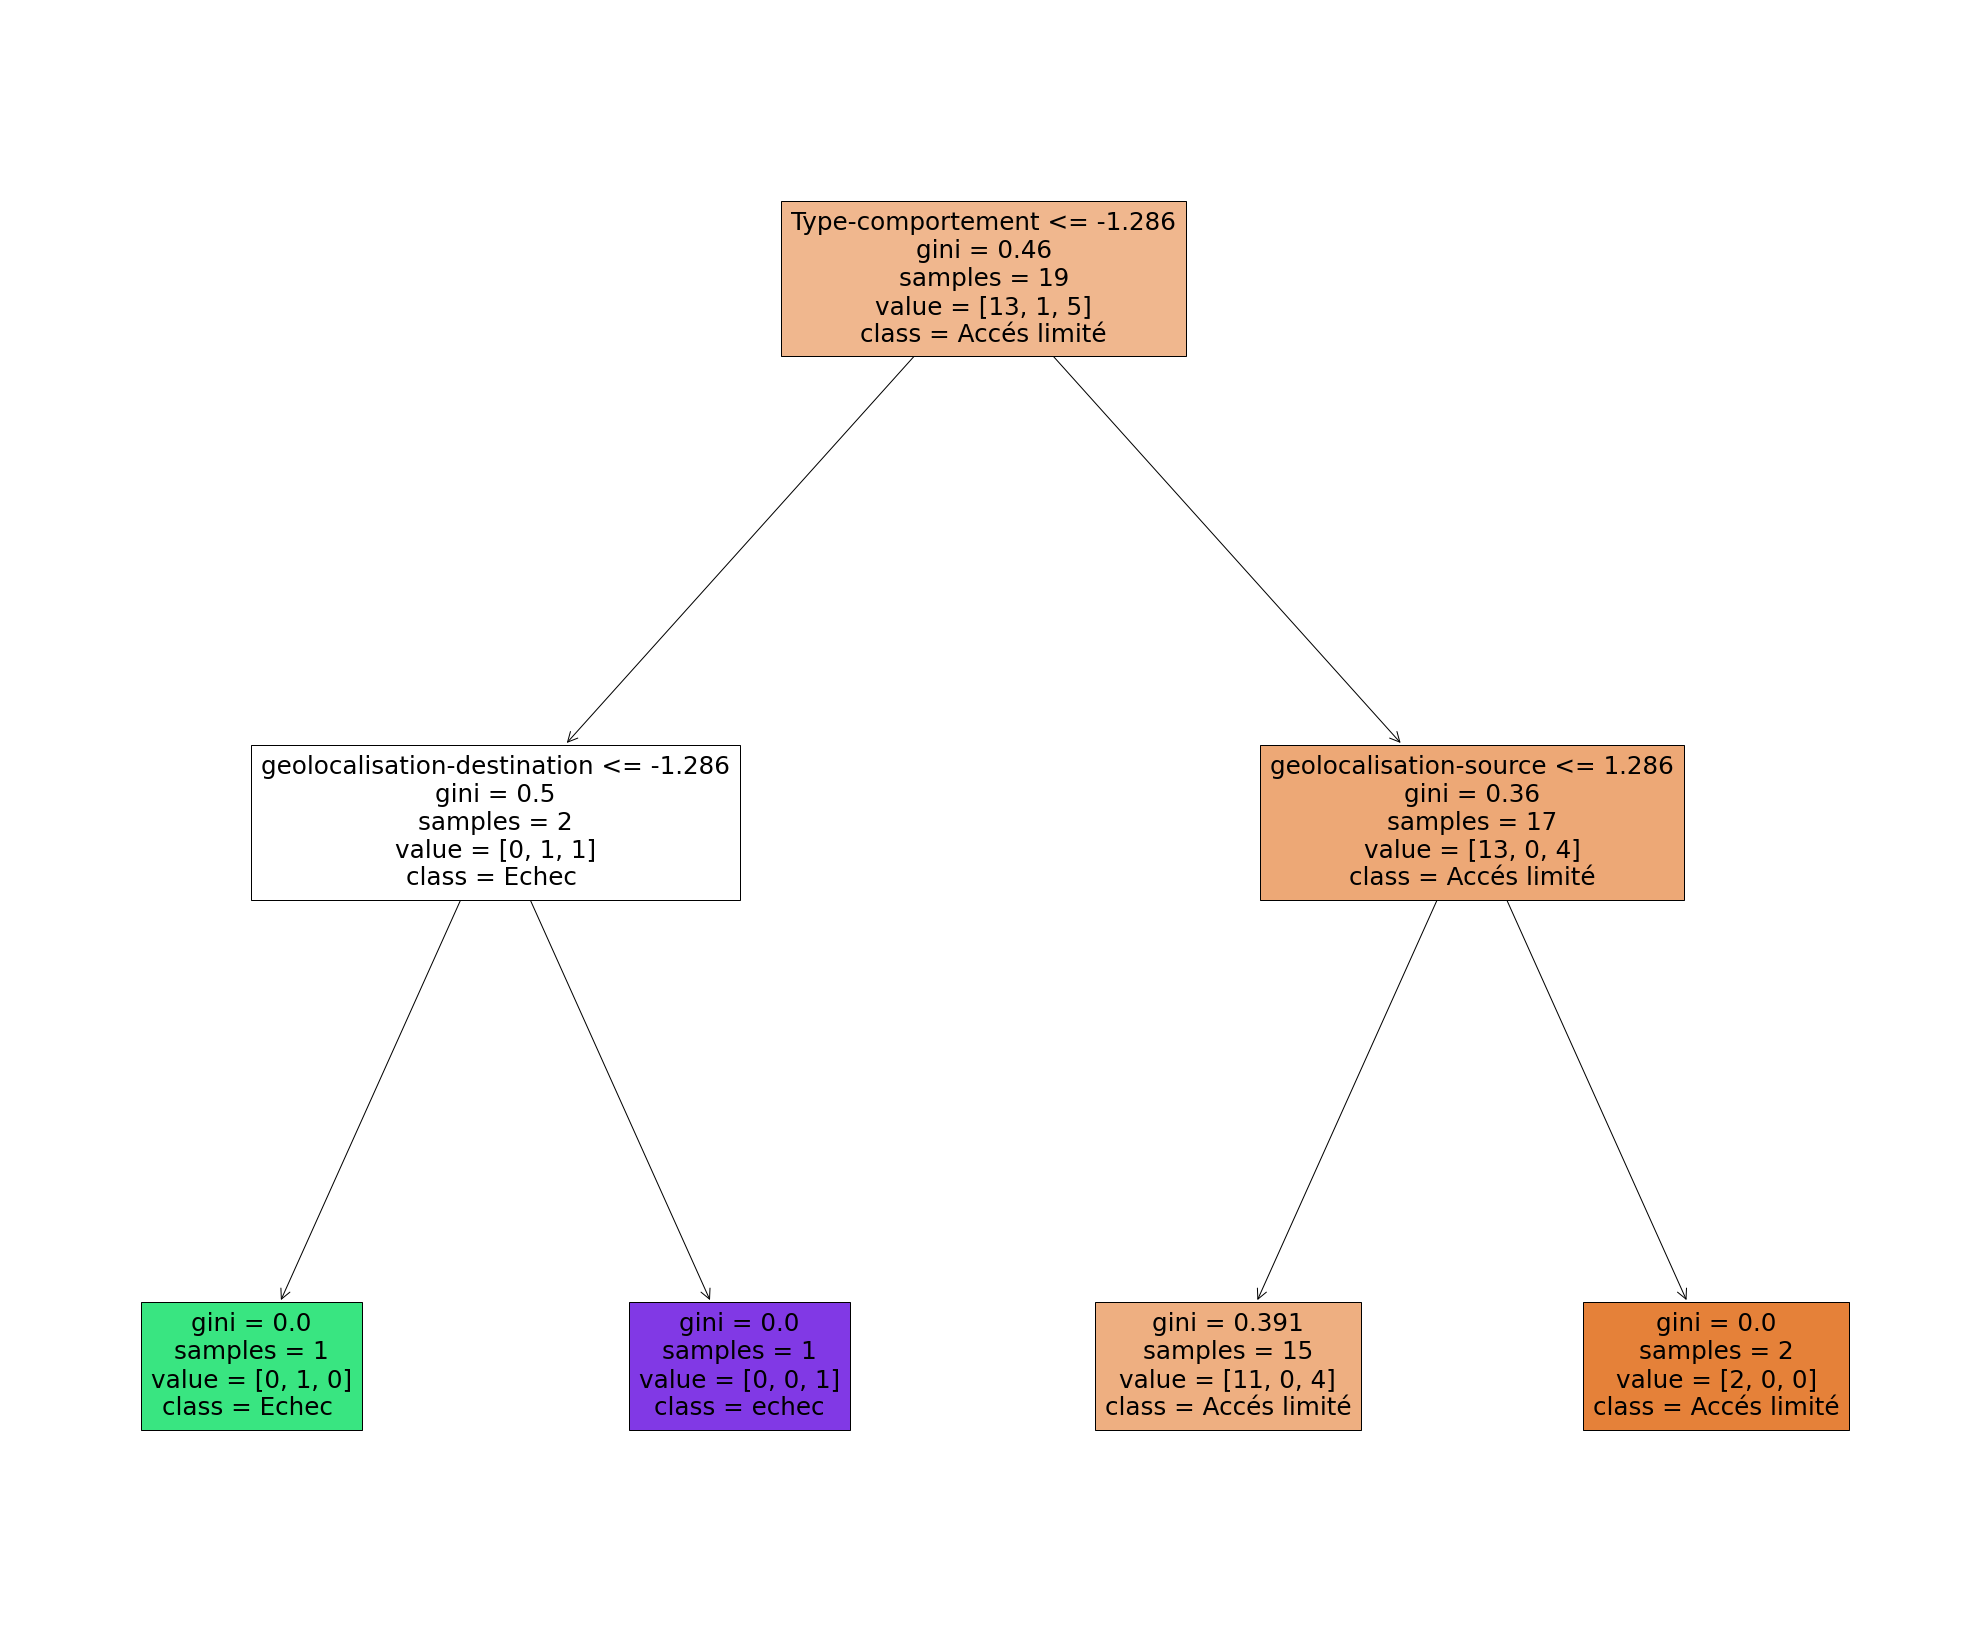

In [54]:
# Display Decision Tree
plt.figure(figsize=(35, 30))
tree.plot_tree(classifier, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
plt.show()

In [55]:
# Spécifier le chemin absolu complet du fichier CSV
df = pd.read_csv("proxy.csv",delimiter=';', encoding='ISO-8859-1')

In [56]:
df.head()

Adresse-IP-Source Geolocalisation-IP-Source Adresse-IP-destination  \
0           123.4.6                     Maroc              126.01.08   
1           123.4.6                     Maroc              126.01.09   
2           123.4.6                     Maroc              126.01.10   
3           123.4.6                     Maroc              126.01.11   
4           123.4.6                     Maroc              126.01.12   

  geolocalisation-IP-destination date-detection-comportement  \
0                          Dubai            02/02/2022 00:00   
1                          Dubai            03/02/2022 00:00   
2                          Dubai            04/02/2022 00:00   
3                          Dubai            05/02/2022 00:00   
4                          Dubai            06/02/2022 00:00   

               Description-comportement Type-comportement  
0  Accés limité après authentification       faux positif  
1  Accés limité après authentification       faux positif  
2  Accés limité après authentification       faux positif  
3  Accés limité après authentification       faux positif  
4  Accés limité après authentification       faux positif

In [57]:
df.columns

Index(['Adresse-IP-Source', 'Geolocalisation-IP-Source',
       'Adresse-IP-destination', 'geolocalisation-IP-destination',
       'date-detection-comportement', 'Description-comportement',
       'Type-comportement'],
      dtype='object')

In [58]:
# Data Preprocessing
# Encode categorical variables
label_encoder = LabelEncoder()
df['Geolocalisation-IP-Source'] = label_encoder.fit_transform(df['Geolocalisation-IP-Source'])
df['geolocalisation-IP-destination'] = label_encoder.fit_transform(df['geolocalisation-IP-destination'])
df['Description-comportement'] = label_encoder.fit_transform(df['Description-comportement'])
df['Type-comportement'] = label_encoder.fit_transform(df['Type-comportement'])

df.drop(['Adresse-IP-Source','Adresse-IP-destination','date-detection-comportement'], axis=1, inplace=True)

In [59]:
df.head()

Geolocalisation-IP-Source  geolocalisation-IP-destination  \
0                          1                               0   
1                          1                               0   
2                          1                               0   
3                          1                               0   
4                          1                               0   

   Description-comportement  Type-comportement  
0                         0                  1  
1                         0                  1  
2                         0                  1  
3                         0                  1  
4                         0                  1

In [60]:
# Split data into features and target variable
X = df.drop('Description-comportement', axis=1)
y = df['Description-comportement']

In [61]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Data Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
# Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
# Accuracy Calculation
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.95


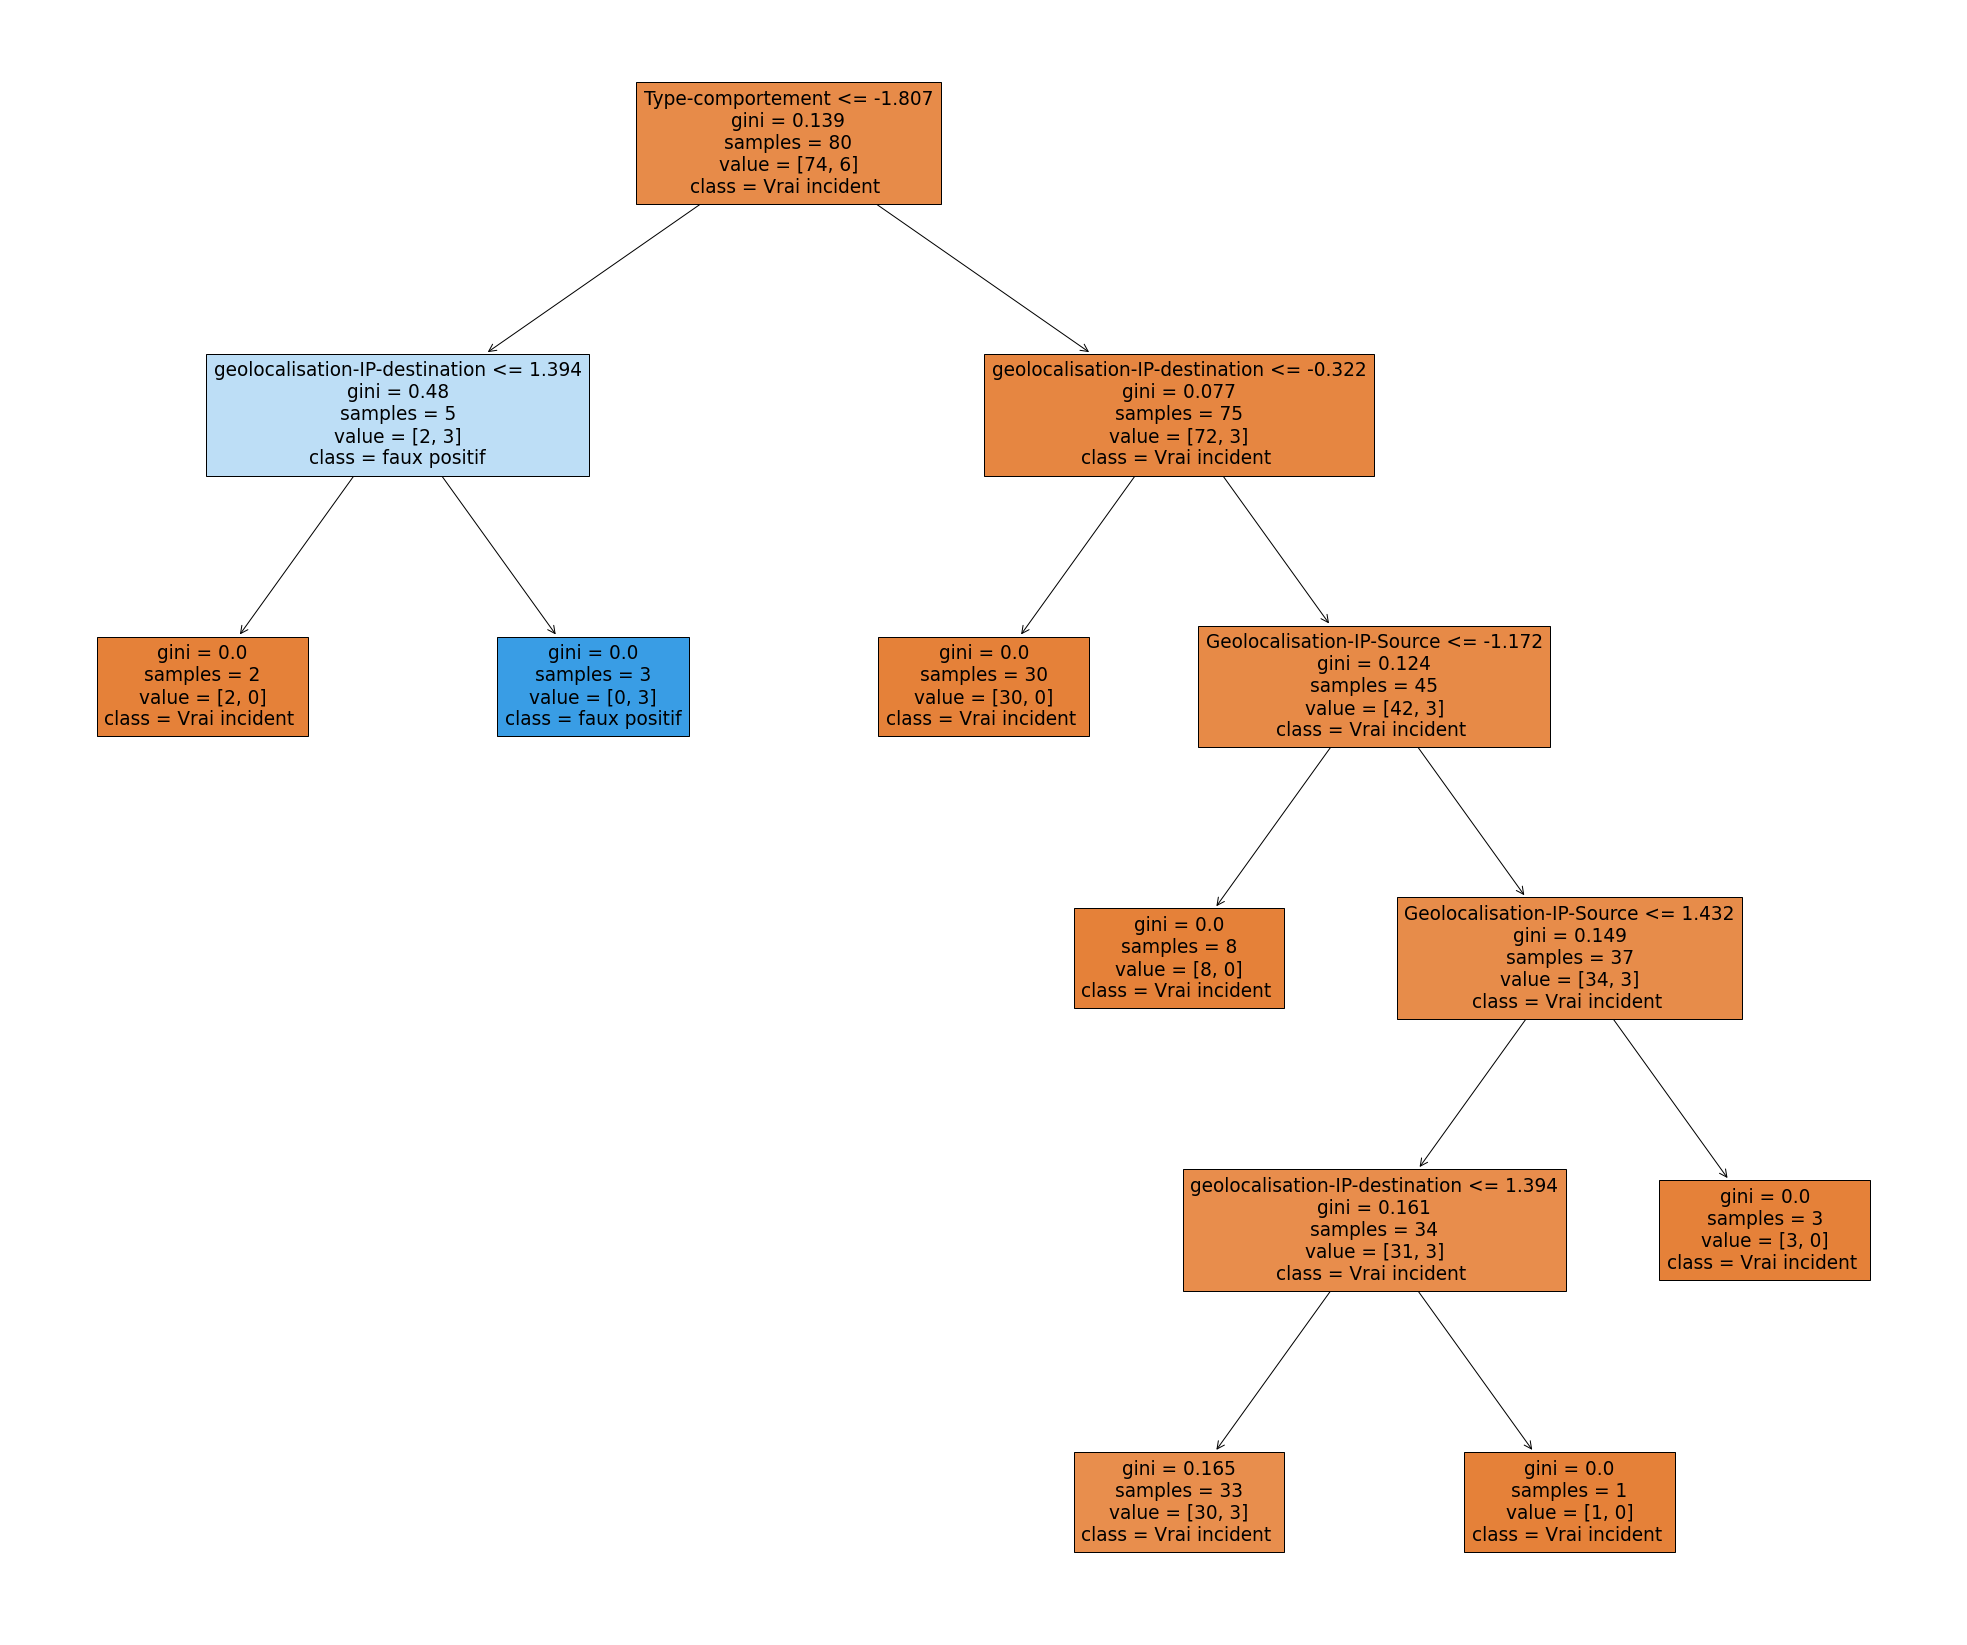

In [65]:
# Display Decision Tree
plt.figure(figsize=(35, 30))
tree.plot_tree(classifier, feature_names=X.columns, class_names=label_encoder.classes_.astype(str), filled=True)
plt.show()